<a href="https://colab.research.google.com/github/oskargirardin/CRP_GDPR_datasets/blob/master/fraud_detection_crp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 83% 55.0M/66.0M [00:00<00:00, 131MB/s]
100% 66.0M/66.0M [00:00<00:00, 128MB/s]


In [5]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [21]:
df = pd.read_csv('creditcard.csv')

In [7]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

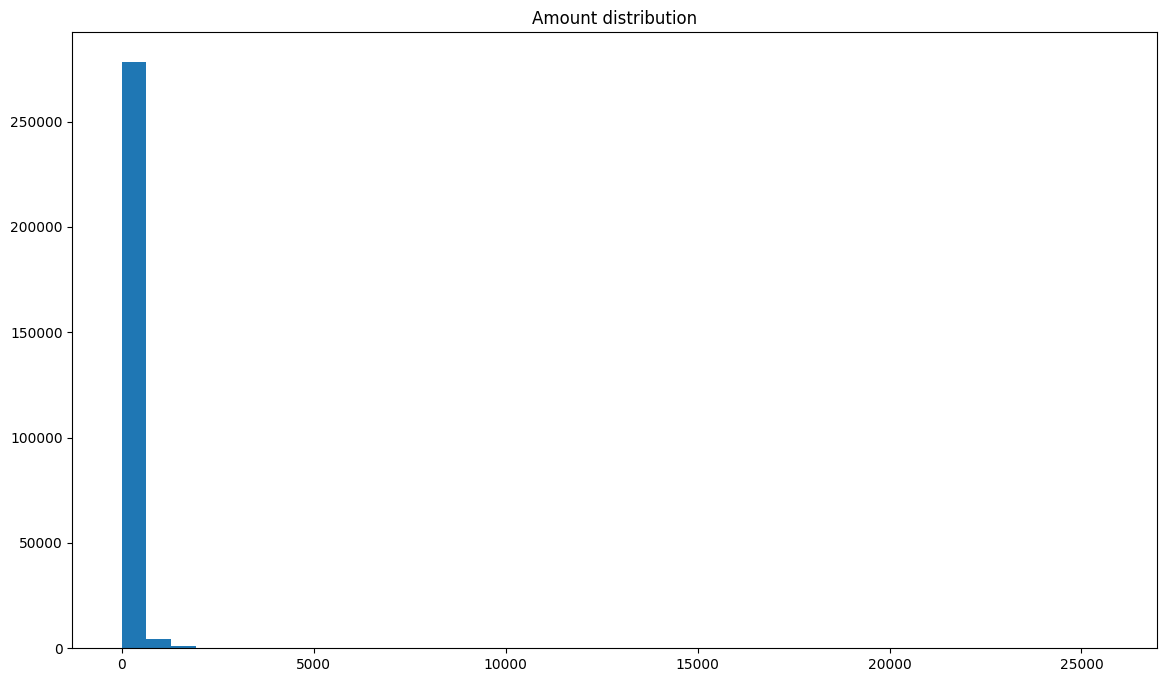

In [12]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['Amount'], bins = 40)
plt.title('Amount distribution')
plt.show()

In [13]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
df[df['Amount']>2200]['Class'].value_counts()

0    568
Name: Class, dtype: int64

In [24]:
df = df[df['Amount']<2200]

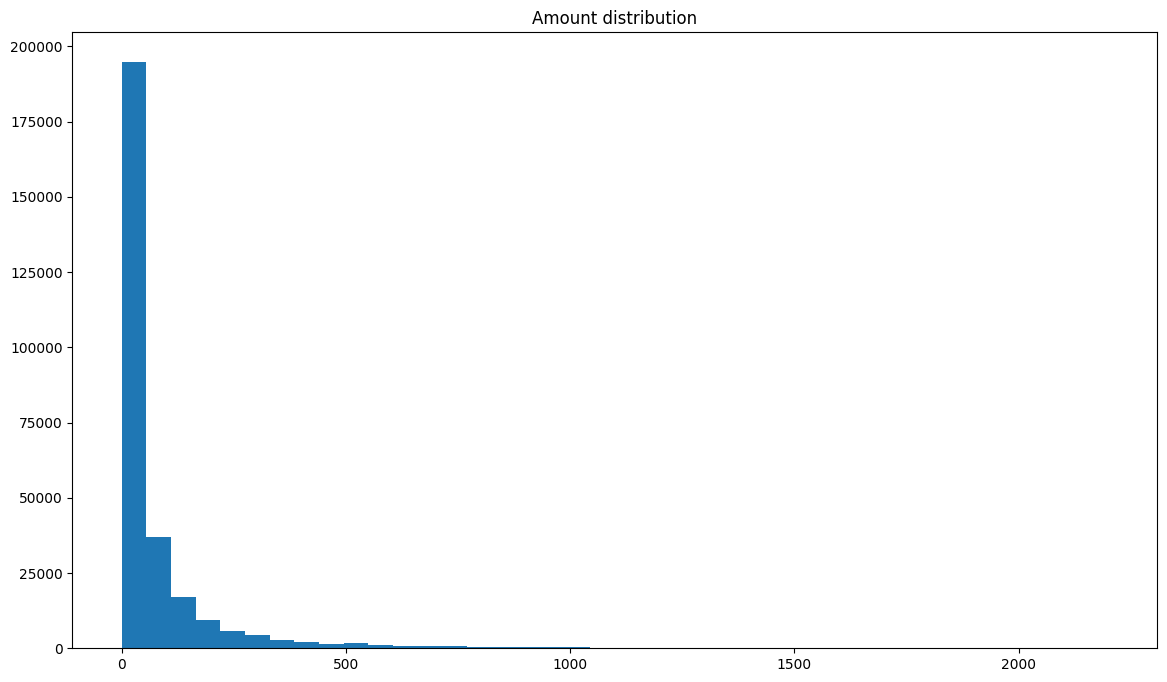

In [25]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['Amount'], bins = 40)
plt.title('Amount distribution')
plt.show()

In [28]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class", axis = 1), 
                                                    df["Class"], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def eval_result(model, X_test, y_test, validation = False):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        pred = model.predict(X_test)

        print("\n", classification_report(y_test, pred, target_names = ['Not Fraud', 'Fraud']), "\n")

        display(pd.DataFrame(confusion_matrix(y_test, pred), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))
        
        print("\n")
        if hasattr(model, 'feature_importances_') and not validation:
            features = pd.DataFrame({
                'Variable'  :X_test.columns,
                'Importance':model.feature_importances_
            })
            features.sort_values('Importance', ascending=False, inplace=True)
            display(features.head(20))

        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.3f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend(loc="lower right")
        plt.show()


               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85123
       Fraud       0.44      0.81      0.57       149

    accuracy                           1.00     85272
   macro avg       0.72      0.90      0.78     85272
weighted avg       1.00      1.00      1.00     85272
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,84970,153
Fraud,29,120


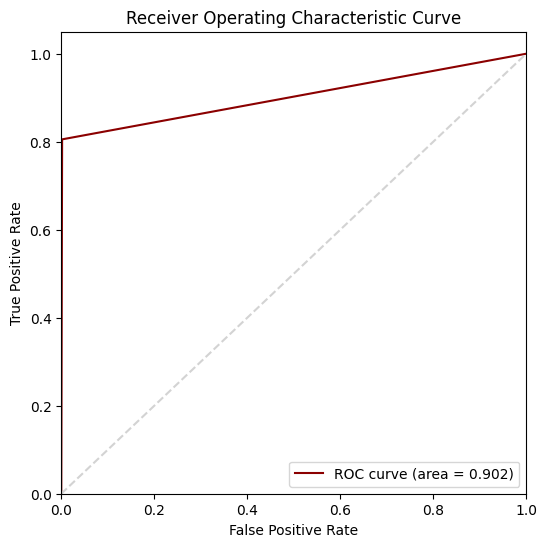

In [31]:
lgmodel = LogisticRegression(
    solver='lbfgs', 
    class_weight={0:1.0, 1:9.5},
    n_jobs = -1,
    random_state = 101
)
lgmodel.fit(X_train, y_train)
eval_result(lgmodel, X_test, y_test)


               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85123
       Fraud       0.94      0.84      0.89       149

    accuracy                           1.00     85272
   macro avg       0.97      0.92      0.94     85272
weighted avg       1.00      1.00      1.00     85272
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,85115,8
Fraud,24,125


,Variable,Importance
14,V14,0.466714
17,V17,0.087122
10,V10,0.053649
4,V4,0.039935
12,V12,0.025147
7,V7,0.024523
29,Amount,0.020277
23,V23,0.019457
8,V8,0.019081
1,V1,0.018050


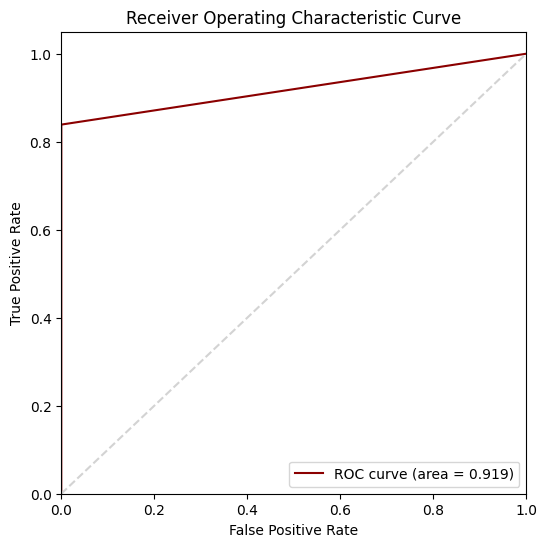

In [54]:
xgbr = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr.fit(X_train.drop('Class',axis=1), y_train)
eval_result(xgbr, X_test, y_test)

In [32]:
df_train = X_train
df_train['Class'] = y_train 

fraud_df = df_train[df_train['Class']==1]
fraud_df = fraud_df.drop('Class', axis = 1)

print(len(fraud_df))


343


In [ ]:
!pip install ctgan 

In [35]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(fraud_df, epochs = 200)

Epoch 1, Loss G:  0.0397,Loss D: -0.0395
Epoch 2, Loss G:  0.0424,Loss D:  0.0075
Epoch 3, Loss G:  0.0460,Loss D: -0.0314
Epoch 4, Loss G:  0.0191,Loss D: -0.0714
Epoch 5, Loss G:  0.0408,Loss D: -0.0915
Epoch 6, Loss G: -0.0053,Loss D: -0.1344
Epoch 7, Loss G:  0.0185,Loss D: -0.2095
Epoch 8, Loss G: -0.0251,Loss D: -0.2092
Epoch 9, Loss G: -0.0276,Loss D: -0.2056
Epoch 10, Loss G: -0.1163,Loss D: -0.2943
Epoch 11, Loss G: -0.1635,Loss D: -0.2351
Epoch 12, Loss G: -0.1726,Loss D: -0.3204
Epoch 13, Loss G: -0.2401,Loss D: -0.3392
Epoch 14, Loss G: -0.3663,Loss D: -0.4319
Epoch 15, Loss G: -0.4258,Loss D: -0.4760
Epoch 16, Loss G: -0.4431,Loss D: -0.4459
Epoch 17, Loss G: -0.5870,Loss D: -0.3200
Epoch 18, Loss G: -0.7759,Loss D: -0.4087
Epoch 19, Loss G: -0.7400,Loss D: -0.4770
Epoch 20, Loss G: -0.9833,Loss D: -0.4682
Epoch 21, Loss G: -1.1307,Loss D: -0.5419
Epoch 22, Loss G: -1.3290,Loss D: -0.2284
Epoch 23, Loss G: -1.4847,Loss D: -0.2832
Epoch 24, Loss G: -1.4448,Loss D: -0.1626
E

In [40]:
samples = ctgan.sample(1500)
samples['Class'] = 1

In [41]:
augmented = pd.concat([samples,df_train],ignore_index=True, axis = 0)

augmented = augmented.sample(frac=1).reset_index(drop=True)


               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85123
       Fraud       0.90      0.85      0.87       149

    accuracy                           1.00     85272
   macro avg       0.95      0.92      0.94     85272
weighted avg       1.00      1.00      1.00     85272
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,85109,14
Fraud,23,126


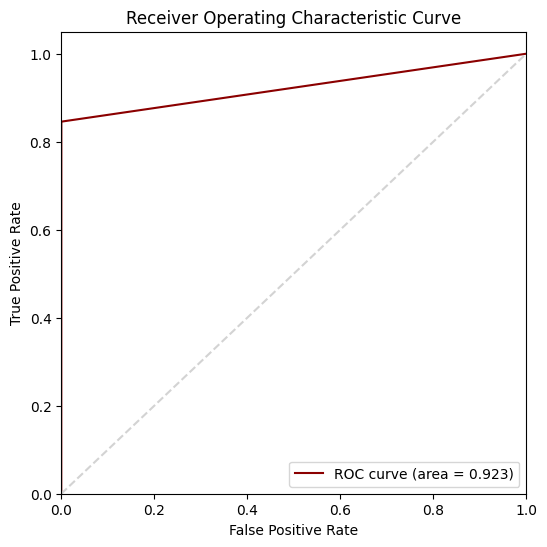

In [42]:
X_train_a = augmented.drop('Class', axis = 1)
y_train_a = augmented['Class']

xgbr_2 = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr_2.fit(X_train_a, y_train_a)
eval_result(xgbr_2, X_test, y_test, validation = True)

In [43]:
from imblearn.over_sampling import SMOTE


               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85123
       Fraud       0.76      0.86      0.81       149

    accuracy                           1.00     85272
   macro avg       0.88      0.93      0.90     85272
weighted avg       1.00      1.00      1.00     85272
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,85083,40
Fraud,21,128


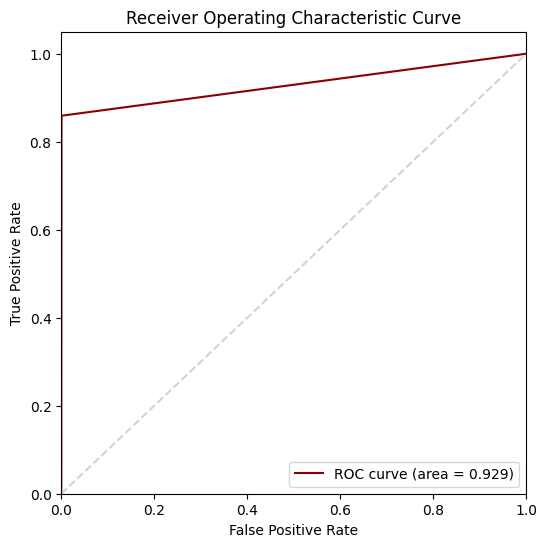

In [51]:
# we create the smote object (upsampling)
sm = SMOTE(random_state=42)

#upsampling the minority class
X_upsampled, y_upsampled = sm.fit_resample(X_train.drop('Class',axis=1), y_train)

xgbr_3 = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr_3.fit(X_upsampled, y_upsampled)
eval_result(xgbr_3, X_test, y_test, validation = True)

In [46]:
X_upsampled.shape

(397246, 31)

In [47]:
X_train.shape

(198966, 31)

In [48]:
X_test.shape

(85272, 30)

In [49]:
for i in list(X_train):
  if i not in list(X_test):
    print(i)

Class


In [50]:
X_train_a.shape

(200466, 30)